In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()


### BEFORE YOU DO ANYTHING...
In the terminal:
1. Navigate to __inside__ your ILAS_Python repository.
2. __COMMIT__ any un-commited work on your personal computer.
3. __PULL__ any changes *you* have made using another computer.
4. __PULL__ textbook updates (including homework answers).

1. __Open Jupyter notebook:__   Start >> Programs (すべてのプログラム) >> Programming >> Anaconda3 >> JupyterNotebook
1. __Navigate to the ILAS_Python folder__. 
1. __Open today's seminar__  by clicking on 7_Numerical_computation_with_Numpy.

<h1>Numerical Computation with Numpy</h1> 

<h1>Lesson Goal</h1> 

To make solutions to mathematical problems involving large data sets, multiple repeated computations and simultaneous solutions more efficient using programming.  

To acheive this we will cover an overview of some widely used tools from the Python Numpy package and related packages such as Matplotlib (plotting), Scipy (scientific computation) and Sympy (symbolic).

## Why are we studying this?
Numerical computation is central to almost all scientific and engineering problems.

There are programming languages specifically designed for numerical computation:
- Fortran
- MATLAB

There are libraries dedicated to efficient numerical computations:
- Numpy
- Scipy
- Sympy ...

NumPy (http://www.numpy.org/) 
 - The most widely used Python library for numerical computations. 
 - Large, extensive library of data structures and functions for numerical computation.
 - Useful for perfoming operation you will learn on mathematics-based courses.


Scipy (https://www.scipy.org/)
- Builds on Numpy, additional functionality
- More specialised data structures and functions over NumPy.

Matplotlib (https://matplotlib.org/)
- A library for generating plots.
- Complementary to numerical computation libraries.

If you are familiar with MATLAB, NumPy and SciPy provide similar functionality. 



#### Transpose of a matrix

- The columns of the transpose matrix are the rows of the original matrix.
- The rows of the transopse matrix are the columns of the original matrix.  

In [64]:
a = np.zeros((2,4))
print(a)
print()


print(a.T)
print()

#or 

print(np.transpose(a))

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]

[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]

[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]


#### Generate Identity Matrix

In [65]:
I = np.eye(2)
print(I)

print()

I = np.eye(4)
print(I)

[[ 1.  0.]
 [ 0.  1.]]

[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


<a id='SimultaneousEqtns'></a>

### Useful Matrix Applications: Solving Simultaneous Equations

A mathematical problem that arises in a wide range of engineering applications; the simultaneous solution to a set of n linear equations with n unknown values.

Matrices are a widely used and popular technique for solving this type of problem.

Solving problems of this __computationally__ is particularly useful where:
- we need to solve a large number of equations simultaneously e.g.
 - the force distribution in a truss structure <img src="img/truss.gif" alt="Drawing" style="width: 300px;"/> 
 - the electrical current flowing in and out of each node in a circuit.
<img src="img/current_flow.png" alt="Drawing" style="width: 150px;"/> 
- we need to solve the equations over multiple steps<br>e.g. observing the progression of a system over time.

### Systems of Equations Example: An Electrical Circuit

In electrical systems, network theory is the study of how to solve circuit problems. 
<br>The voltage and current in a closed circuit obey two simple rules;  
- Kirchoff's current law (first law)
- Kirchhoff's voltage law (second law)
<img src="img/kirchhoffLaws.png" alt="Drawing" style="width: 300px;"/> 


#### Kichoff's Current Law

The algebraic sum of ALL the currents entering and leaving a junction must be equal to zero.

$\sum i_{in} - \sum i_{out} = 0 $


<img src="img/kirchhoffCurrentLaw.png" alt="Drawing" style="width: 200px;"/>

#### Kirchhoff's Voltage Law
For a closed loop series path the algebraic sum of all the *voltages* and *voltage drops* around any closed loop in a circuit is equal to zero.

$\sum E - \sum V = 0 $

<img src="img/kirchhoffVoltageLaw.png" alt="Drawing" style="width: 200px;"/> 


#### Electrical Elements Obey Ohm's Law 
The current through a conductor (I, units amps) is the voltage measured across the conductor (V, units volts) divided by the resistance (R, units Ohms).

$$V = IR$$


A Wheatstone bridge circuit is a very widely used circuit in scientific equipment.

It is found in strain gauges, heart rate monitors, wind tunnels....etc.

Fundamentally, it is used to measure resistance.

<img src="img/Wheat4.png" alt="Drawing" style="width: 200px;"/> 

A wheatstone bridge circuit has mutiple loops and nodes. 

<img src="img/Wheat1.png" alt="Drawing" style="width: 200px;"/> 

It has one voltage source, $E$.  

It has five resisters $R_1, R_2, R_3, R_4, R_5, R_6$.

<br>
*Let's say we want to find the current in each branch $i_{1-6}$...*



The circuit has:
 - 4 loops (A-D)
 - a nodes (a-d)
 

<img src="img/Wheat2.png" alt="Drawing" style="width: 200px;"/> 

 



We can use Kirchhoff's laws and Ohm's law with $E$ and $R_{1-6}$.

$\sum i_{in} - \sum i_{out} = 0 $

$\sum E - \sum V = 0 $

$V = IR$

<img src="img/Wheat2.png" alt="Drawing" style="width: 200px;"/> 

 


6 unknown values ($i_{1-6}$), 6 simultaneous equations.
<img src="img/Wheat3.png" alt="Drawing" style="width: 200px;"/>

__Loop A:__ &nbsp; $R_1 i_1 + R_2 i_2 + R_5 i_5 = E$<br>
__Loop B:__ &nbsp; $R_4 i_4 - R_5 i_5 + R_6 i_6 = 0$<br>
__Loop C:__ &nbsp; $R_2 i_2 - R_3 i_3 + R_4 i_4 = 0$

__Node a:__ &nbsp; $i_2 - i_4 - i_5 = 0$<br>
__Node b:__ &nbsp; $i_1 - i_2 - i_3 = 0$<br>
__Node c:__ &nbsp; $i_5 + i_6 - i_1 = 0$<br>



We can express these equations as matrices:

\begin{equation*}
\underbrace{
\begin{bmatrix}
R_1 & R_2 & 0    & 0   &  R_5 & 0   \\
0   & 0   & 0    & R_4 & -R_5 & R_6 \\
0   & R_2 & -R_3 & R_4 &  0   & 0   \\
0   & 1   & 0    & -1  &  -1  & 0   \\
1   & -1  & -1   & 0   &  0   & 0   \\
-1  & 0   & 0    & 0   &  1   & 1   \\
\end{bmatrix}
}_{\mathbf{R}}
\cdot
\underbrace{
\begin{bmatrix}
i_1 \\
i_2 \\
i_3 \\
i_4 \\
i_5 \\
i_6 \\
\end{bmatrix}
}_{\mathbf{I}}
=\underbrace{
\begin{bmatrix}
E \\
0 \\
0 \\
0 \\
0 \\
0 \\
\end{bmatrix}
}_{\mathbf{V}}
\end{equation*}

In [66]:
# Let's assign some values to our known variables:
E = 5

R1, R2, R3, R4, R5, R6 = 300, 500, 1000, 500, 1000, 500

R = np.array([[R1, R2,  0,   0,   R5, 0 ],
              [0,  0,   0,   R4, -R5, R6],
              [0,  R2, -R3,  R4,  0,  0 ], 
              [0,  1,   0,  -1,  -1,  0 ],
              [1, -1,  -1,   0,   0,  0 ],              
              [-1, 0,   0,   0,   1,  1]])

V = np.array([E, 0, 0, 0, 0, 0])

We can find $\mathbf{I}$ by matrix multiplication:
\begin{align*}
\mathbf{R}\cdot\mathbf{I}&=\mathbf{V}\\
\end{align*}

but we have to rearrange the equation.

\begin{align*}
\mathbf{I}  &=\frac{\mathbf{V}}{\mathbf{R}}\\
            &=\mathbf{R^{-1}}\cdot\mathbf{V}\\
\end{align*}


In [67]:
R_inv = np.linalg.inv(R)

I = np.dot(R_inv, V)

print(I)

[ 0.005  0.003  0.002  0.001  0.002  0.003]


Numpy conveniently solves linear matrix equations of the form `ax = b` so we don't need to rearrange. 

In [68]:
I = np.linalg.solve(R, V)
print(I)

[ 0.005  0.003  0.002  0.001  0.002  0.003]


You can check your answer by confirming that the dot product, $\mathbf{R}\cdot\mathbf{I}$ is equal to $\mathbf{V}$.

In [69]:
print(R @ I)
print(np.around(R @ I, 2))

[  5.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   3.46944695e-18  -8.67361738e-19]
[ 5.  0.  0.  0.  0. -0.]


This process is a fast and simple way to solve simultaneous linear equations, for example when compared to eilimination methods. 

<a id='DiffEqtns'></a>

### Systems of Equations Example: Rates of Change
A well known problem concerns an imaginary country with three cities, A, B and C. 
<br>At the end of each year, a fraction, $n$ of the people must leave each city.
<br>Half of the people leaving a city move to one of the two options, and half to the other.

<img src="img/cities3.png" alt="Drawing" style="width: 400px;"/> 

This gives us a system of simultaneous equations

\begin{align*}
\Delta A = \frac{Bn}{2} + \frac{Cn}{2} - An \\
\Delta B = \frac{An}{2} + \frac{Cn}{2} - Bn\\
\Delta C = \frac{An}{2} + \frac{Bn}{2} -Cn \\
\end{align*}




Matrices are a convenient way to represent this problem.  

\begin{equation*}
\begin{bmatrix}
\Delta A \\
\Delta B \\
\Delta C \\
\end{bmatrix}
=
\underbrace{
\begin{bmatrix}
-n & \frac{n}{2} & \frac{n}{2} \\
\frac{n}{2} & -n & \frac{n}{2} \\
\frac{n}{2} & \frac{n}{2} & -n \\
\end{bmatrix}
}_{\mathbf{migration}}
\cdot
\underbrace{
\begin{bmatrix}
A \\
B \\
C \\
\end{bmatrix}
}_{\mathbf{population}}
\end{equation*}



Assigning values to $\mathbf{M}$ and $\mathbf{P}$.

\begin{equation*}
\begin{bmatrix}
\Delta a \\
\Delta b \\
\Delta c \\
\end{bmatrix}
=
\underbrace{
\begin{bmatrix}
-0.2 & 0.1 & 0.1 \\
0.1 & -0.2 & 0.1 \\
0.1 & 0.1 & -0.2 \\
\end{bmatrix}
}_{\mathbf{M}}
\cdot
\underbrace{
\begin{bmatrix}
A \\
B \\
C \\
\end{bmatrix}
}_{\mathbf{P}}
\end{equation*}



By solving the problem computationally, we can quickly solve multiple iterations. 

In the example below there are two functions.

The first, `pop_change` computes the rate of change of the population. 

The second, `pop_plot`:
- calls `pop_change` inside of it
- generates a line plot showing the population change over time

In [70]:
# Initial population
P0 = np.array([190.0, 500.0, 30.0])

# Matrix migration or M
migration = np.full((3, 3), 0.01)
np.fill_diagonal(migration, -0.02)


def pop_change(P, M=migration):
    "Computes the change in population of three cities"
    return np.dot(P, M)



    



In [71]:
def pop_plot(iterations, population):
    "Plots the population over the number of iterations specified"
    
    # make 2D array to append values to a column for each city
    record_pop = population.reshape((1,3))  
    
    for i in range(iterations):
        
        # Increment population size
        population = population + pop_change(population) 
        
        # Save the population data
        record_pop = (np.append(record_pop, 
                                population.reshape((1,3)), # make 2D array
                                axis = 0))
        

    
    plt.plot(record_pop[:,0] , label="A")
    plt.plot(record_pop[:,1] , label="B")
    plt.plot(record_pop[:,2] , label="C")
    plt.xlabel("Years")
    plt.ylabel("Population")
    plt.legend();
    #plt.plot(record_pop)
    #print(record_pop)

total population = 720.0


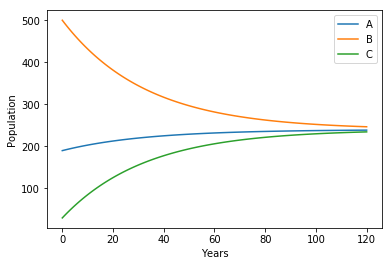

In [72]:
# Plot the change in the populations of the cities over time
pop_plot(iterations=120, population=P0) 

print(f"total population = {np.sum(P0)}")

In the example above the array `migration` or `M` just describes the change in a quantity; the population of each city.

When a change in quantity is measured against a change in __time__ it describes the rate of change or flow of that quantity. 

Rates are expressed as differential equations: the change in one parameter in relation to a change in another parameter. e.g. 
 - velocity = change in position / change in time
 - acceleration = change in velocity / change in time

The Scipy library has easy to use tools for estimating the solutions to systems of (or single) differential equations like the example we just looked at.

The function `odeint` solves first order differential equations.

In [73]:
from scipy.integrate import odeint

The function `odeint` takes a user-defined function as an argument.

This input function should simply define the derivative (e.g. rate of change) you want to solve.

For example, a function to calculate the derivative:

$\frac{dx}{dt} = t - x$

with initial value $x(0) = 1$

we can use:

In [74]:
def dx_dt(x,t):
    return t - x

Two additional arguments are needed:
- the value(s) of t at which to evaluate x, starting with the initial value
- the initial value
- (if `dx_dt` takes any other argumemts they are entered as a tuple as the third argument)

In [75]:
ts = np.linspace(0,5,100) # the value(s) of t at which to evaluate x
x0 = 1.0                  # the initial value

# odeint returns x at each value of t
xs = odeint(dx_dt, x0, ts)

The function `odeint` returns an nx1 array (2D column).
<br>To plot the output we have to "flatten" it to a 1D array.

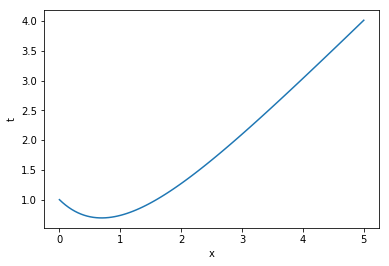

In [76]:
# The function
#print(xs)
xs = np.array(xs).flatten()
#print(xs)

# plot the function  
plt.xlabel("x")
plt.ylabel("t")
plt.plot(ts, xs);

We can use `odeint` to solve mulitple ordinary differential equations simultaneously (systems of ODEs).

In this case the value of each variable at the initial position should be input as a single data structure.

The function should output the rate of change of each variable as a single list.



For example we can use `odeint` to solve the population problem from earlier.

The function dP_dt is exactly the same as the function `change_pop` that we used  earlier. The only difference is that `dP_dt` returns the individual rates of chnage of each population as a list. 

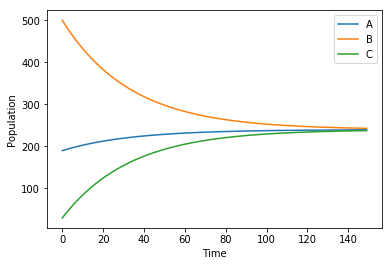

In [77]:
migration = np.full((3, 3), 0.01)
np.fill_diagonal(migration, -0.02)

# Initial population
P0 = np.array([190.0, 500.0, 30.0])

# Time steps to evaluate
ts = np.arange(0, 150)

def dP_dt(P, t, M):
    
    dP_dt = np.dot(P, M)
    
    return [dP_dt[0], 
            dP_dt[1], 
            dP_dt[2]]

Ps = odeint(dP_dt, P0, ts, args=(migration,))

plt.plot(ts, Ps[:,0], label="A")
plt.plot(ts, Ps[:,1], label="B")
plt.plot(ts, Ps[:,2], label="C")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend();

For comparison, here is the original solution, generated using the user-defined `pop_plot`function.  

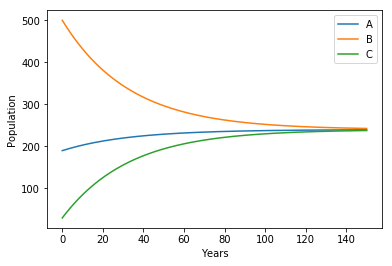

In [78]:
pop_init = np.array([190.0, 500.0, 30.0])
pop_plot(iterations=150, population=pop_init)

An example of this might be the data read from a sensor during an experiment.

In the experiment shown below, the bend in the arm is used to control the LED light.

<img src="img/wearable_tech.png" alt="Drawing" style="width: 400px;"/> 
The sensor used to detect the bend in the arm is made from conductive paint.

The resistance of the paint changes with the bend in the arm.

This change in resistance is detected as a voltage.

A microcontroller adjusts the light in repsonse to the voltage.

The circuit on which the sensor is based is very similar to the Wheatsone bridge circuit. 

When calibrating a sensor like this, we need to find a relationship between the bend in the arm and the change in resisitance. 

After that the voltage alone can be used to 'read' the bend in the arm.

This section will cover some useful Numpy features for curve fitting.



### Broadcasting Example: Calorie Calculator

Let's say we have a large data set; each datum is a list of parameters.

Example datum: a type of food and the the amount of fat, protein and carbohydrate in a serving of that food.

Our data set of food nutrients might look something like the table below:

|Food (100g) |Fat(g)|Protein (g)|Carbohydrate (g)|
|------------|----- |-----------|----------------|
|Almonds     |    49|         21|              22|                         
|Peas        |     0|          5|              14|   
|Avocado     |    15|          2|               9|
|Kale        |     1|          3|              10|  

   


By applying the following sclaing factors, we can calculate the number of calories in a food type due to fat, protein and carbohydrate:
 -  fat: 9 cal/g
 -  protein: 4 cal/g
 -  carbohydrate 4 cal/g
 
Using what we have studied so far, we could convert the table to calories using a loop:


```python

nutrients = np.array([[49, 21, 22],
                      [0,   5, 14],
                      [15,  2,  9],
                      [ 1,  3, 10]])

cal_convert = np.array([9, 4, 4])

calories = np.empty((4,3))

for index, value in enumerate(nutrients):
    calories[index] = value * cal_convert
    
```
    

However, it is faster and more concise to broadcast the two arrays together: 

In [99]:
nutrients = np.array([[49, 21, 22],
                      [0,   5, 14],
                      [15,  2,  9],
                      [ 1,  3, 10]])

cal_convert = np.array([9, 4, 4])

calories = nutrients * cal_convert

print(calories)

[[441  84  88]
 [  0  20  56]
 [135   8  36]
 [  9  12  40]]


### Broadcasting Example: Vector Quantisation Algorithm
This is a simple algorithm used for catagorisation.
<br>It determines which catagory a data point should belong to from its closest proximity to a set of values representing possible catagories.
<br>Each value represents the mean of the corresponding catagory.





<br>For example, colour quantisation is used in image processing reduces the number of distinct colors used in an image, while maintianing visual similarity to the original image. 

<table><tr><td> 
<img src="img/un_quantised_cat.png" alt="Drawing" style="width: 300px;"/> </td><td> 
<img src="img/quantised_cat.png" alt="Drawing" style="width: 300px;"/> </td><td> 
</table>

CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=1477223

<br>In the plot below, each of the circles represents the mean height and weight of athletes grouped by type. 
<br>The square represents the height and weight of an athlete to be classified. 
<img src="img/vector_quantisation.png" alt="Drawing" style="width: 500px;"/>


To find the closet point:
1. Use broadcasting to find the difference between the position of the __square__ and the position of each __circle__ in the x and y directions. <br>
1. Find the distance, $d$ from the square, $s$ to each circle, $c$ using: <br>$d = \sqrt{(x_{c}-x_{s})^2 + (y_{c}-y_{s})^2}$ <br>
1. Choose the group corresponding to the minimum distance, $d_{min}$

In [100]:
athlete = np.array([111.0,188.0])

categories = np.array([[102.0, 203.0],
                       [132.0, 193.0],
                       [45.0, 155.0],
                       [57.0, 173.0]])

# 1. broadcast
diff = categories - athlete

# 2. distance to each point (magnitude of values along axis 1 for each datum)
# dist = np.linalg.norm(diff,axis=1)
dist = np.sqrt(np.sum(diff**2,axis=1))

# 3. which group?
nearest = np.argmin(dist)
print(nearest)

0


The nearest group is index 0 of the array `catagories`.
<br>Based on mean height and weight, the athlete is most likely to be a basketball player.

## Resizing and Reshaping
We can change the size of an array in each dimension.

For example, you may want to edit the length of a dimension of an array to make it compatible with another array for broadcasting.



### Resizing
We can resize an array. 
<br>If the new array size is smaller, the original array will be trimmed to the new size.

In [101]:
a=np.array([[0,1],
            [2,3]])

b = np.resize(a,(2,1))
print(b)
print()

a.resize(2,1)
print(a)

[[0]
 [1]]

[[0]
 [1]]


If the new array size is larger, the extra space can either be filled with repeating copies of the original array.

In [102]:
a=np.array([[0,1],
            [2,3]])

b = np.resize(a,(4,4))
print(b)

[[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]


or with zeros.

In [103]:
a=np.array([[0,1],
            [2,3]])

a.resize(4,4)
print(a)

[[0 1 2 3]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


### Reshaping
You can re-shape the array. 
The new array must have the __same number of elements__ as the original array.



__Example:__ Using range to create a column vector:

In [104]:
x = np.arange(0, 31, 10)
y = x.reshape((4,1))

# which can be written in one line as:
z = np.arange(0, 31, 10).reshape((4,1))

print(x)
print()
print(y)
print()
print(z)

[ 0 10 20 30]

[[ 0]
 [10]
 [20]
 [30]]

[[ 0]
 [10]
 [20]
 [30]]


## Review Exercises

The folowing exercises are provided to practise what you have learnt in today's seminar.

The extension excercises cover topics that will not be included inthe exam but may be useful to you if you are familiar with using matrices and want to practise matrix manipulation using Python.

If you have not yet studied matrices, you can come back to this section when the mathematics used is more familiar to you. 



### Review Exercise: 1D Arrays - Indexing and changing values.

In the cell below:

1. Create an array of zeros with length 25. <br> <a href="#Zeros">Jump to Creating a Numpy Array of Zeros.</a>

2. Change the first 10 values to 5. <br> <a href="#Changing">Jump to Changing items in an array.</a>

3. Change the next 10 values to a sequence starting at 12 and increasig with steps of 2 to 30 - do this with one command. 

4. Change the final 5 values to 30. 

In [105]:
# 1D array

In [106]:
# Example Solution

# 1
a = np.zeros(25)

#2
a[: 10] = 5

#3
a[10: 20] = range(12, 31, 2)

#4
a[20:] = 30

print(a)

[  5.   5.   5.   5.   5.   5.   5.   5.   5.   5.  12.  14.  16.  18.  20.
  22.  24.  26.  28.  30.  30.  30.  30.  30.  30.]


### Review Exercise: 1D Arrays - Correct the error

The code below, is supposed to:
 - change the last 5 values of the array x to the values [50, 52, 54, 56, 58]
 - print the result
There are some errors in the code.

Remove the comment markers and run the code to see the error message.

Then fix the code and run it again.

In [107]:
#x = np.ones(10)
#x[5:] = np.arange(50, 62, 1)
#print(x)

In [108]:
# Example Solution
import numpy as np
x = np.ones(10)
x[-5:] = range(50, 59, 2)
print(x)

[  1.   1.   1.   1.   1.  50.  52.  54.  56.  58.]


### Review Exercise:  Creating 2D Arrays 

Print:

__(A)__ An array with 3 rows and 2 columns (3 by 2), where all elements are 1.0.

<a href="#CreatingArray">Jump to Creating a Numpy Array.</a>

__(B)__ An array of randomly generated integers, in the range 1 to 10, with 4 rows and one column (4 by 1).

<a href="#Subpackages">Jump to Subpackages.</a>

__(C)__ An array with 2 rows and 2 columns (2 by 2), where all elements are 4.




In [109]:
# 2D arrays

In [110]:
### Example Solution
# A
print(np.ones((3,2)))

# B
print(np.random.randint(1, 10, size=(4,1)))

# C
print(np.full((2,2), 4))

[[ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]]
[[5]
 [4]
 [7]
 [1]]
[[4 4]
 [4 4]]


### Review Exercise:  2D Arrays - Indexing and Basic Plotting

__(A)__ In the cell below, for the array `x`, write code to print: 

* the first row of `x`
* the first column of `x`
* the third row of `x`
* the four values in the upper right hand corner of `x`
* the four values at the center of `x`
* the last two columns (third and fourth column) of `x`

<a href="#Indexing">Jump to Indexing into multi-dimensional arrays.</a>

__(B)__ You have just *printed* the last two columns of `x`. 
<br>Now plot the third column of `x` against the fourth column of `x` as a line graph.

<a href="#Plotting">Jump to Introduction to Plotting.</a>

In [111]:
# 2D array 
x = np.array([[4, 2, 1, 1],
              [2, 4, 2, 8],
              [2, 4, 3, 27],
              [4, 1, 4, 64]])

[4 2 1 1]
[4 2 2 4]
[ 2  4  3 27]
[[1 1]
 [2 8]]
[[4 2]
 [4 3]]
[[ 1  1]
 [ 2  8]
 [ 3 27]
 [ 4 64]]


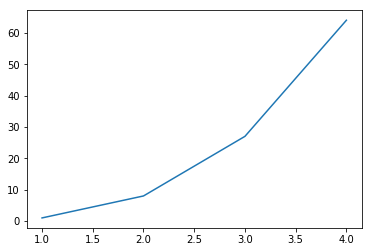

In [112]:
# Example Solution

x = np.array([[4, 2, 1, 1],
              [2, 4, 2, 8],
              [2, 4, 3, 27],
              [4, 1, 4, 64]])

print(x[0])

print(x[:, 0])

print(x[2])

print(x[0:2, 2:4])

print(x[1:3, 1:3])

print(x[:, 2:4])

plt.plot(x[:, 2], x[:, 3])

### Review Exercise:  Boolean array indexing

Print the values of array `x` in the cell below that are...

__(A)__ ...greater than 3.

__(B)__ ...greater than 2 and less than 8.

__(C)__ ...less than 2 or greater than 8.

__(D)__ ...a multiple of `y`.

<br>
__(E)__ Change all odd numbers in x to 0

<a href="#BooleanIndexing">Jump to Boolean Array Indexing.</a>

In [113]:
x = np.arange(10)
y = 2

### Review Exercise: Curve Fitting

Using the example data set `a`,`b`:

__(A)__ Plot a scatter graph of `a` against `b`, with `a` on the horizontal axis and `b` on the vertical axis. 
<br><a href="#ScatterPlot">Jump to Scatter plot.</a>

__(B)__ Fit __three different__ curves to the data. You can choose from:
 - a linear relationship. <a href="#FittingLinear">Jump to Fitting a linear relationship.</a>
 - a polynomial curve. <a href="#FittingPolynomial">Jump to Fitting a polynomial curve.</a>
 - an arbitrary function <a href="#FittingArbitrary">Jump to Fitting an arbitrary curve.</a>

__(C)__ Plot each curve as a line of on the graph.
<br><a href="#LinePlot">Jump to Line plot.</a>

__(D)__ Find the route mean square error (RMSE) of each curve relative to the data set.
<br><a href="#RMSE">Jump to Route mean square error.</a>

__(E)__ Display the RMSE of each curve as a figure legend.
<br><a href="#Legend">Jump to Adding a legend.</a>

__(F)__ Print the equation of the *optimal* curve i.e. the curve with the *smallest* RMSE. 

In [114]:
a = np.array([88438,45505,75127,115571,89911,87432,100083,85589,73104,86890,78580,70785,41050,57610,107537,59262,73038,87891,75368,111638,74911,71599,96774,79667,90725,93816,75859,64969,205688,71500,53098,71250,89615,94747,50400,63673,78257,72785,83015,150000,84699,67191,86298,117705,88935,89643,106678,97894,132164,59387,60684,96151,68794,74559,29430,88362,111792,57205,83651,87518,80129,86801,110761,63274,66143,110694,52590,59994,80460,103589,68298,59056,40294,161848,103100,86354,37428,43307,80792,77368,109159,71538,84783,86250,82900,74728,48597,75549,106942,102167,62708,60630,70273,84918,88693,74141,46627,119112,88260,97262,86095,110472,82734,84761,91715,103292,86339,147993,77560,100625,68094,78250,75426,86138,112344,115000,98846,90499,80029,61959,76779,68833,81026,66361,92737,76692,64974,103869,51951,108854,61038,75938,75346,40639,73156,80067,82322,52353,
              62832,207262,160106,77740,72011,167094,58458,41639,79528,66583,83993,138082,77366])
b = np.array([1.7,-0.4,0.5,2.6,1.4,1.5,1.5,1.7,-0.5,1.6,0.9,1.1,-1.7,0.3,1.8,0.5,1,1.9,0.1,2,1.7,1,1.2,1.5,1,1.1,1.2,0,2.6,1.4,-0.8,1.6,1.1,1.2,-1.4,-0.5,1.9,0,1.5,2.4,1.5,0.7,1.8,2,2.4,1.6,2,2.3,2,0.1,0.3,2.3,0,0,-1.7,1.9,2,0,0.9,1.3,0.4,1.6,2.3,-0.1,1.7,2.1,-0.9,0.1,1,1.9,0.4,-0.3,-2.4,2.7,1.3,2,-1.3,-1.5,0.7,1.1,2.3,1.1,0.7,0.9,1.1,0.1,-0.9,1.4,2.1,1.2,0.1,0.8,0.3,1.4,1.5,1,-0.5,2.4,0.9,1.5,1.6,1.2,1.3,1.8,0.8,1.8,1.9,2.6,1.5,1.8,1.8,0.6,0.7,1.2,1.5,2.5,1.1,1.6,1.6,1,0,0,1,0.5,1.7,0.6,0.1,1.7,0.2,2.1,0.1,0.9,0.8,-1.3,1.3,0.5,1.5,-0.6,1.2,2.4,2.6,1.1,0.8,2.5,-0.2,-2,0.1,0.1,1.6,2.6,1.2])


0.4774


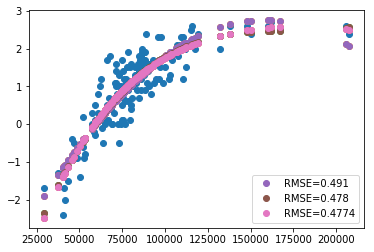

In [115]:
### Example solution

a = np.array([88438,45505,75127,115571,89911,87432,100083,85589,73104,86890,78580,70785,41050,57610,107537,59262,73038,87891,75368,111638,74911,71599,96774,79667,90725,93816,75859,64969,205688,71500,53098,71250,89615,94747,50400,63673,78257,72785,83015,150000,84699,67191,86298,117705,88935,89643,106678,97894,132164,59387,60684,96151,68794,74559,29430,88362,111792,57205,83651,87518,80129,86801,110761,63274,66143,110694,52590,59994,80460,103589,68298,59056,40294,161848,103100,86354,37428,43307,80792,77368,109159,71538,84783,86250,82900,74728,48597,75549,106942,102167,62708,60630,70273,84918,88693,74141,46627,119112,88260,97262,86095,110472,82734,84761,91715,103292,86339,147993,77560,100625,68094,78250,75426,86138,112344,115000,98846,90499,80029,61959,76779,68833,81026,66361,92737,76692,64974,103869,51951,108854,61038,75938,75346,40639,73156,80067,82322,52353,
              62832,207262,160106,77740,72011,167094,58458,41639,79528,66583,83993,138082,77366])
b = np.array([1.7,-0.4,0.5,2.6,1.4,1.5,1.5,1.7,-0.5,1.6,0.9,1.1,-1.7,0.3,1.8,0.5,1,1.9,0.1,2,1.7,1,1.2,1.5,1,1.1,1.2,0,2.6,1.4,-0.8,1.6,1.1,1.2,-1.4,-0.5,1.9,0,1.5,2.4,1.5,0.7,1.8,2,2.4,1.6,2,2.3,2,0.1,0.3,2.3,0,0,-1.7,1.9,2,0,0.9,1.3,0.4,1.6,2.3,-0.1,1.7,2.1,-0.9,0.1,1,1.9,0.4,-0.3,-2.4,2.7,1.3,2,-1.3,-1.5,0.7,1.1,2.3,1.1,0.7,0.9,1.1,0.1,-0.9,1.4,2.1,1.2,0.1,0.8,0.3,1.4,1.5,1,-0.5,2.4,0.9,1.5,1.6,1.2,1.3,1.8,0.8,1.8,1.9,2.6,1.5,1.8,1.8,0.6,0.7,1.2,1.5,2.5,1.1,1.6,1.6,1,0,0,1,0.5,1.7,0.6,0.1,1.7,0.2,2.1,0.1,0.9,0.8,-1.3,1.3,0.5,1.5,-0.6,1.2,2.4,2.6,1.1,0.8,2.5,-0.2,-2,0.1,0.1,1.6,2.6,1.2])

# A
plt.plot(a, b,'o')

# B
c, d, e = np.polyfit(a, b, 2)

f, g, h, i = np.polyfit(a, b, 3)

j, k, l, m, n = np.polyfit(a, b, 4)

# C
yfit2 = np.poly1d([c, d, e])(a)
yfit3 = np.poly1d([f, g, h, i])(a)
yfit4 = np.poly1d([j, k, l, m, n])(a)

# yfit2 = c*a**2 + d*a + e
# yfit3 = f*a**3 + g*a**2 + h*a + i
# yfit4 = j*a**4 + k*a**3 + l*a**2 + m*a + n

plt.plot(a, yfit2,'o')
plt.plot(a, yfit3,'o')
plt.plot(a, yfit4,'o')

# D
# Define a function
def RMSE(ideal, real):
    return round(
        np.sqrt
        (np.sum
         ((ideal - real)**2)/ len(real))
        , 4)

# error
rmse2 = RMSE(yfit2, b)
rmse3 = RMSE(yfit3, b)
rmse4 = RMSE(yfit4, b)

# E
# You don't need to replot the data as shown here, you can just add the labels to your answer to part C
plt.plot(a, yfit2,'o', label = f"RMSE={rmse2}")
plt.plot(a, yfit3,'o', label = f"RMSE={rmse3}")
plt.plot(a, yfit4,'o', label = f"RMSE={rmse4}")
plt.legend(loc='best')

# F
print(np.min([rmse2, rmse3, rmse4]))

### Review Exercise:  Vectorising a function

Recall the function `is_positive` that we looked at in Seminar 5: Functions.

A similar function is shown in the cell below.

It takes an argument, `x` and returns:
- `True` if `x` is positive.
- `False` if `x` is negative. 

Write a vectorised version of the function that will accept a Numpy array as an argument.

<br><a href="#Vectorising">Jump to Vectorising a function.</a>

Demonstrate your function works by calling it.  

In [116]:
def is_positive(x):
    "Checks if the function value f(x) is positive"
    return x > 0

In [117]:
# Example Solution

def is_positive(x):
    "Checks if the function value f(x) is positive"
    return x > 0

is_positive_vec = np.vectorize(is_positive)

z = [1, 2, 3]

is_positive_vec(z)

array([ True,  True,  True], dtype=bool)

### Review Exercise: Broadcasting
Use a single broadcasting operation to:
- add 2 to every element in the first column of `a`
- add 3 to every element in the second column of `a`
- subtract 1 from every element in the third column of `a`

In [118]:
a = np.array([  [49, 21, 22],
                [0,   5, 14],
                [15,  2,  9],
                [ 1,  3, 10]])

In [119]:
# Example Solution
print(a + np.array([2, 3, -1]))

[[51 24 21]
 [ 2  8 13]
 [17  5  8]
 [ 3  6  9]]


### Extension Exercise:  Broadcasting and Mathematics with matrices - Simultaneous Equations, Polynomial Coeffcients

The equation of a parabola can be fully defined using three points that lie on the curve (provided the curve is not a  straight line). 

The equation for a parabola is $y=ax^2+bx+c$, where $a$, $b$, and $c$ are constants.

__(A)__Given three points $(x_1,y_1)$, $(x_2,y_2)$, $(x_3,y_3)$,
<br>three simultaneous equation may be written: 
$$
\begin{split}
x_1^2a+x_1b+c&=y_1 \\
x_2^2a+x_2b+c&=y_2 \\
x_3^2a+x_3b+c&=y_3 \\
\end{split}
$$

Given that:
<br>$(x_1,y_1)=(-2,2)$ 
<br>$(x_2,y_2)=(1,-1)$ 
<br>$(x_3,y_3)=(4,4)$
<br>use matrix multiplication to find $a$,$b$ and $c$.

<a href="#SimultaneousEqtns">Jump to Simultaneous Equations.</a>
<br><a href="#Broadcasting">Jump to Broadcasting.</a>

Hint: 
<br>Build a 1D array, `y`,  containing values $y_1$, $y_2$ and $y_3$.
<br>Build a 2D array, `x`, with which to multiply `y` to find a 1D array containing $a$, $b$ and $c$.


__(B)__ Show that your solution is correct by:
 - plotting a graph of $y=ax^2+bx+c$ against $x$ for range of x.
 - plotting the three points: <br>$(x_1,y_1)=(-2,2)$ <br>$(x_2,y_2)=(1,-1)$ <br>$(x_3,y_3)=(4,4)$ <br>as points to check that they lie on the curve.





In [120]:
# Solve the simultaneous equations to find a, b and c

In [121]:
# Example solution

# 1D array, y
y = np.array([2, -1, 4])

# 2D array, x
x = np.array([[(-2**2), -2, 1],
              [(1**2),   1, 1],
              [(4**2),   4, 1]])

abc = np.linalg.solve(x, y)
print(abc)



# Another way to create matrix x without writing it out explicitly is to use:
# - broadcasting
# - the numpy function, power (raises first argument to power of second)
xs = np.array([-2, 1, 4])
xs = xs.reshape((3,1))
power = np.array([2, 1, 0])
x = np.power(xs, power)

[ 0.8        -2.33333333  0.53333333]


### Extension Exercise:  Solving systems of first order differential equations - Predator & prey

The predator-prey equations represent a simplified model of two species interacting; for example:
 - rabbits $x$(prey)
 - population $y$: foxes (predators) 

*The more foxes there are*, the more rabbits get eaten by foxes and the population of rabbits gets smaller...
<br>...so there is less food for the foxes so the population of foxes gets smaller...
<br>...so there is less danger to the rabbits, so the population fo rabbits gets bigger...
<br>...so there is more food for the foxes, so the population of foxes gets bigger...
<br>...*The more foxes there are*....

We can expect to see the two populations rise and fall cyclically with time. 

The two related populations can be described by a pair of first-order non-linear ordinary differential equations. 

\begin{align*}
\frac{dx}{dt}&=x(a-by)\\
\frac{dy}{dt}&=-y(c-dx)\\
\end{align*}

Where:
<br>$a$ represents rabbit births
<br>$b$ represents rabbit deaths due to foxes
<br>$c$ represents fox deaths in the absence of rabbits
<br>$d$ represents foxes kept alive by feeding on rabbits

<br>($a,b,c,d$ are assumed to be positive)

__(A)__ Use `odeint` to estimate the solution to the couple differntial equations:
 - between time = 0 and time = 20 units (suggested time step = 0.1 unit) 
 - where $a=b=c=d=1$
 - for initial conditions:<br>$x(0)=150$ <br>$y(0)=100$

<a href="#DiffEqtns">Jump to  Systems of Equations for Rates of Change.</a>

__(B)__ Plot the two populations using a graph. <br>Include a legend to label the two populations.

__(C)__ Try changing the values of $a,b,c,d$ and the initial number of rabbits and foxes and observe the output in your graph.

In [122]:
# Predator-prey equations

[  0.           4.04040404   8.08080808  12.12121212  16.16161616
  20.2020202   24.24242424  28.28282828  32.32323232  36.36363636
  40.4040404   44.44444444  48.48484848]
[  1.00000000e+02   4.43025189e+00   7.79297460e-02   1.37081211e-03
   2.41137608e-05   4.24435515e-07   7.49358543e-09   1.54587239e-10
   2.34287703e-08   1.89964057e+00   3.34153742e-02   5.87787283e-04
   1.03398510e-05]
[  1.50000000e+02   5.37742890e-10   2.94982647e-10   1.55336273e-08
   8.81918480e-07   5.01761526e-05   2.85354948e-03   1.62224492e-01
   9.22235391e+00   7.07684419e-11   6.37388370e-10   3.50649534e-08
   1.99240435e-06]


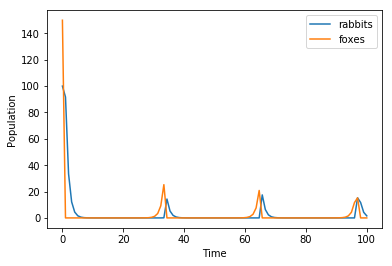

In [127]:
# Example solution

# A
# Between time = 0 and time = 100
ts = np.linspace(0, 100, 100)

a,b,c,d = 1,1,1,1

# Define function that returns differential 
def dP_dt(P, t):
    
    return [P[0]*(a - b*P[1]), 
           -P[1]*(c - d*P[0])]

# Initial conditions
P0 = [150, 100]

# Solve using odeint
Ps = odeint(dP_dt, P0, ts)


# B 
# plot the two populations using a graph
foxes = Ps[:,0]
rabbits = Ps[:,1]

plt.plot(ts, rabbits, label="rabbits")
plt.plot(ts, foxes,label="foxes")

t = ts[0:50:4]
r = rabbits[0:50:4]
f = foxes[0:50:4]

plt.xlabel("Time")
plt.ylabel("Population")
# Include a legend
plt.legend();

print(t)
print(r)
print(f)

# Summary

- Numpy arrays are a type of data structure optimised for numerical computations.
- Unlike data structure such as lists and tuples, an array can store data in multiple dimensions.
- Numpy array are a convenient way to represent vectors and matrices.
- Numpy funcions generally behave in an "elementwise" way.
- We can "vectorise" other functions so that they accept data structure as arguments.
- Broasdcasting is a useful tool for applying information in one numpy array to another without having to repeat or reshape the arrays to match one another.  
- The matplotlib library can be used to quicky produce simple plots to visualise and check your solutions to mathematical problems.  
- This includes fitting a curve or a relationship to a dataset.

###### Homework 

1. __PULL__ the changes you made in-class today to your personal computer.
1. __COMPLETE__ any unfinished Review Exercises.
1. __PUSH__ the changes you make at home to your online repository. 
1. Install __ffmpeg__...

#### Installing FFmpeg
FFmpeg is software for handling multimedia data.
<br>You must have it installed to view the animatied figures we will produce in next week's seminar. 

###### Installing FFmpeg on mac
Open a terminal.
Copy and paste the following command into the terminal to install homebrew (a linux-like package manager): 
>`ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install)"`

Copy and paste the following command into the terminal to install FFmpeg: 
>`brew install ffmpeg` 

To check ffmpeg has installed copy and paste the following command into the terminal:
>`ffmpeg -version`

If FFmpeg has installed a few lines of code will appear, starting with the version number which will be something like:
>`ffmpeg version 3.4 Copyright (c) 2000-2017 `



###### Installing FFmpeg on linux
Open a terminal.
Copy and paste the following commands into the terminal (one-by-one, pressing enter after one) to install ffmpeg: 
>`sudo add-apt-repository ppa:kirillshkrogalev/ffmpeg-next
sudo apt-get update
sudo apt-get install ffmpeg`

To check ffmpeg has installed copy and paste the following command into the terminal:
>`ffmpeg -version`

If FFmpeg has installed a few lines of code will appear, starting with the version number which will be something like:
>`ffmpeg version 3.4 Copyright (c) 2000-2017 `





###### Installing FFmpeg on  windows

Open a terminal.

To find out what version of windows you have, copy and paste the following command into the terminal to see if your computer has a 32 or 64 bit CPU:
>`wmic os get osarchitecture`

Go to ffmpeg.zeranoe.com/builds/ 
 - Click the appropraite __Architecture__ for your computer.
 - Click Static __Linking__
 - Leave __Version__ as the default.
 - Click __Download Build__

Go to your computer's Downloads folder.
 - Right click on the newly downloaded .zip folder (it's name will start with `ffmpeg`).
 - Choose __Extract All__ from the drop-down menu.
 - If given the option to choose a location to extract the files to, choose your Program Files folder.<br>Otherwise, a non-.zip folder of the same name as the one you downloaded will appear in the Downloads folder. <br>Copy the folder to your Program Files folder.
 - Change rename of the folder you just copied into Program Files with the name:
 <br>`ffmpeg`
 
Go back to the terminal and copy and paste the following command into the terminal to add ffmpeg to the windows path: 
>`PATH=C:\Program Files\ffmpeg\bin;%PATH%`

To check ffmpeg has installed copy and paste the following command into the terminal:
>`ffmpeg -version`

If FFmpeg has installed a few lines of code will appear, starting with the version number which will be something like:
>`ffmpeg version 3.4 Copyright (c) 2000-2017 `



Please do this before next week's class.